# Markov

In [1]:
import random
import numpy as np

class Flumph:
    def __init__(self, born, chances):
        self.chances = chances
        self.born = born
        self.states = {
            0: "Hungry",
            1: "Satisfied",
            2: "Rushed",
            3: "Sad"
        }
    
    def calculateChances(self, matrix):
        num = random.uniform(0, 1)

        startV = np.dot(matrix, self.chances)

        for i in range(len(startV)):
            num -= startV[i]
            if num < 0:
                return startV, i
    
    def calculateTensor(self, matrix, boolean=False):
        if boolean:
            startV = np.outer(matrix, self.chances)
        else:
            startV = np.outer(matrix, np.outer(matrix, self.chances))
        return startV

Classe 'Flumph'. Iedere Flumph heeft een property 'chances', 'born' en 'states'. 
'chances' = kansen dat een Flumph zich in x toestand bevindt. 
'born' = toestand kansen van een pasgeboren Flumph. 
'states' = de staten waarin een Flumph zich kan bevinden. 

num is een random getal tussen de 0 en 1. 
startV is de dot product van de kans vector van een Flumph en de kansen Matrix.

In de functie 'calculateChances' wordt dus een random getal tussen 0 en 1 gekozen. Daarna gaat een for loop door alle getallen van startV heen. Als (num = num - startV[i]) < 0 dan wordt 'i' gereturned. 

Functie 'calculateTensor' berekent het tensor product. 

Als bool=false dan wordt het tensor product van 'matrix' en tensor product (matrix, kansen) berekent. 
Als bool=true dan wordt het tensor product van 'matrix' en kansen berekent. 

In [2]:
import matplotlib.pyplot as plt

hunger = []
satisfaction = []
rush = []
sadness = []

def appendTo(arr, appendArr):
    for i in range(len(appendArr)):
        appendArr[i].append(arr[i])

def resetArrs(arr):
    for i in range(len(arr)):
        arr[i].clear()

Arrays 'hunger', 'satisfaction', 'rush' en 'sadness' worden gebruikt om de kansen over de tijd op te slaan voor iedere state. 

Functie 'appendTo' neemt een array 'arr' en een array 'appendArr' aan. 'arr' is een array met getallen. 'appendArr' is een array met arrays. Iedere waarde in 'arr' wordt aan de juiste array in 'appendArr' toegevoegd. 

Functie 'resetArrs' reset een set arrays, zodat deze allemaal weer leeg zijn. 

In [3]:
def calculateOverTime(flumph, arr):
    counter = 0
    newStart, index = flumph.calculateChances(flumph.born)
    days = []
    while counter < 20:
        counter += 1
        newStart, index = flumph.calculateChances(newStart)
        print("Current state:", flumph.states[index])
        appendTo(newStart, arr)
        days.append(counter)


    plt.plot(days, hunger, label="Hunger")
    plt.plot(days, satisfaction, label="Satisfaction")
    plt.plot(days, rush, label="Rush")
    plt.xlabel("Days")
    plt.ylabel("Chance")
    plt.legend()
    plt.show()

    resetArrs(arr)

Functie 'calculateOverTime' berekent de kansen voor iedere staat iedere dag, tot dag 20. De functie neemt een flumph en een array aan. 

Eerst berekent de functie de staat van de Flumph na de geboorte. Daarna wordt voor iedere dag de kansen van iedere staat berekent en uitgeprint. Deze kansen worden daarna toegevoegd aan de arrays in 'arr'. 

Op het eind worden de resultaten geplot en worden alle arrays in 'arr' gereset. 

Current state: Rushed
Current state: Hungry
Current state: Satisfied
Current state: Hungry
Current state: Hungry
Current state: Hungry
Current state: Hungry
Current state: Hungry
Current state: Rushed
Current state: Hungry
Current state: Hungry
Current state: Hungry
Current state: Hungry
Current state: Hungry
Current state: Rushed
Current state: Hungry
Current state: Hungry
Current state: Rushed
Current state: Hungry
Current state: Hungry


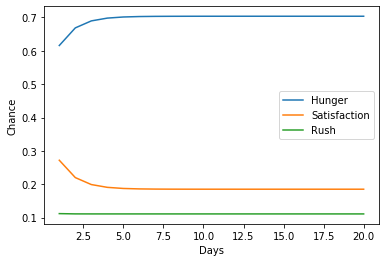

In [4]:
#PART 1
chances = [
    [.8, .1, .1], #hungry today
    [.4, .5, .1], #satisfied today
    [.6, .2, .2]] #rushed today

newBorn = [0.1, 0.7, 0.2]

newFlumph = Flumph(newBorn, chances)
calculateOverTime(newFlumph, [hunger, satisfaction, rush])

De kansen matrix en de originele kans vector voor deel 1 van de opdracht zijn hier aangemaakt. Ook wordt hier onze eerste Flumph aangemaakt. Bij deze Flumph wordt alleen gelet op 3 states: hunger, satisfaction, rush. 

Current state: Hungry
Current state: Hungry
Current state: Rushed
Current state: Rushed
Current state: Sad
Current state: Hungry
Current state: Rushed
Current state: Rushed
Current state: Sad
Current state: Rushed
Current state: Hungry
Current state: Hungry
Current state: Hungry
Current state: Hungry
Current state: Sad
Current state: Sad
Current state: Satisfied
Current state: Hungry
Current state: Satisfied
Current state: Hungry


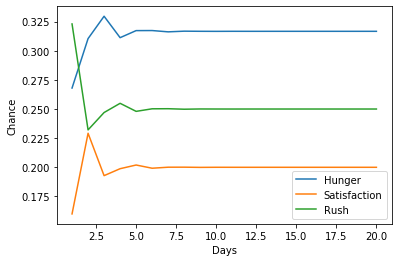

In [5]:
#PART 2
newChances = [
    [.1, .1, .5, .3], #sad today
    [.7, .1, .1, .1], #hungry today
    [.3, .5, .1, .1], #satisfied today
    [.3, .1, .2, .4]  #rushed today
]

newBorn2 = [.1, .6, .2, .1]

newFlumph2 = Flumph(newBorn2, newChances)
calculateOverTime(newFlumph2, [hunger, satisfaction, rush, sadness])

De kansen matrix en de originele kans vector voor deel 2 van de opdracht zijn hier aangemaakt. Bij deze Flumph wordt gelet op 4 states: sadness, hunger, satisfaction, rush. 

In [6]:
print(newFlumph.calculateTensor(newFlumph.born))
print()
print(newFlumph.calculateTensor(newFlumph.born, True))

[[0.008 0.001 0.001 0.004 0.005 0.001 0.006 0.002 0.002 0.056 0.007 0.007
  0.028 0.035 0.007 0.042 0.014 0.014 0.016 0.002 0.002 0.008 0.01  0.002
  0.012 0.004 0.004]
 [0.056 0.007 0.007 0.028 0.035 0.007 0.042 0.014 0.014 0.392 0.049 0.049
  0.196 0.245 0.049 0.294 0.098 0.098 0.112 0.014 0.014 0.056 0.07  0.014
  0.084 0.028 0.028]
 [0.016 0.002 0.002 0.008 0.01  0.002 0.012 0.004 0.004 0.112 0.014 0.014
  0.056 0.07  0.014 0.084 0.028 0.028 0.032 0.004 0.004 0.016 0.02  0.004
  0.024 0.008 0.008]]

[[0.08 0.01 0.01 0.04 0.05 0.01 0.06 0.02 0.02]
 [0.56 0.07 0.07 0.28 0.35 0.07 0.42 0.14 0.14]
 [0.16 0.02 0.02 0.08 0.1  0.02 0.12 0.04 0.04]]


Het tensor product is het combineren van twee vector ruimten tot een nieuwe vector ruimte. Het cartetisch product van beide vectoren wordt berekent. Cartetisch product = geordende paren (x, y), (y, x). 

Bij eindigdimensionale vectorruimten geldt: dim V ⊗ dim W = dim V x dim W 

M ⊗ v: 
.1 x .8 = .08
.1 x .1 = .01
.1 x .1 = .01
etc. 
.7 x .8 = .56
.7 x .1 = .07
.7 x .1 = .07
etc. 

Ieder getal in de Matrix wordt vermenigvuldigd met ieder getal in de vector. Het eerste getal in de vector wordt met alle getallen in de Matrix vermenigvuldigd, daarna wordt het tweede getal in de vector met alle getallen in de Matrix vermenigvuldigd etc. 

M ⊗ (M ⊗ v): Eerst wordt M ⊗ v berekent, wat dus precies hetzelfde is als hierboven beschreven. Laten we de uitkomst van    M ⊗ v, X noemen. Vervolgens wordt M ⊗ X gedaan. Dan wordt eigenlijk weer hetzelfde gedaan als hierboven beschreven. 